# Tensorflow to generate Neural Net

In the workbook '4_Supervised_Classification', a series of machine learning algoritms were applied, with the conclusion that the SVM had the highest accuracy

Using tensortflow, I will compare the accuracy of this method against the SVM.

### Import the relevant libraries

In [1]:
# General Libraries
import itertools
import numpy as np
import time
import pickle
import os
import glob
import sys

# plotting
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
%matplotlib inline

#sklearn
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns
sns.set()

import tensorflow as tf

# Forces the print statement to show everything and not truncate
# np.set_printoptions(threshold=sys.maxsize) 
start = time.time()
print('Libraries imported')

Libraries imported


### Data

In [2]:
# Extract inputs to temp sets
#npz1 = np.load('Train_Set.npz')
npz2 = np.load('Train_Set_Bool.npz')
#npz3 = np.load('Test_Set.npz')
npz4 = np.load('Test_Set_Bool.npz')

# To see headers in files
#for k in npz3.files:
#    print(k)

In [3]:
# Inputs in npz are extracted to relevant sets
# Variables cast to type to ensure format is correct
#train_inputs=npz1['inputs'].astype(np.float)
#train_targets=npz1['targets'].astype(np.int)
#validate_inputs=npz3['inputs'].astype(np.float)
#validate_targets=npz3['targets'].astype(np.int)

train_inputs_bool=npz2['inputs'].astype(np.float)
train_targets_bool=npz2['targets'].astype(np.int)
validate_inputs_bool=npz4['inputs'].astype(np.float)
validate_targets_bool=npz4['targets'].astype(np.int)

In [4]:
#print(np.unique(train_targets), len(np.unique(train_targets)))
#print(np.unique(test_targets), len(np.unique(test_targets)))
print(np.unique(train_targets_bool), len(np.unique(train_targets_bool)))
print(np.unique(validate_targets_bool), len(np.unique(validate_targets_bool)))

[0 1 2] 3
[0 1 2] 3


### Model
In this section, I will cover the following:
1. Outline of the model
2. Optimizers & loss funtion
3. Early stopping and training

In [5]:
# Intialize hyperparameters learning rate, epochs and batch size
epochs = 20 # Too large a value will overfit
batch_size = 10 # mini-batch gradient descent

# Learning rate - should be high enough so we dont iterate forever
# but also low enough so we dont osciallate about local min
# Looking for global min
init_lr = 1e-3

# Input size is dependent on number of inputs, output size on number of 
# outputs and hidden layer size is kept constant for every dense layer
input_size = 12
output_size = 3 
hidden_layer_size = 50 # Width of the hidden layer

I will start with a model that is 3 layers 'depth'. The 'Hidden layer' is defined as a combination of linear + non-linear function, and is created using tf.keras.layers.Dense. 

This is basically implementing: output = activation(dot(input, weight) + bias). 

The function takes several arguments, but the most critical ones are the hidden_layer_size and the activation function

In [6]:
# Outline the model will look like
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='sigmoid'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='sigmoid'), # 2nd hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='sigmoid'), # 3rd hidden layer
    # the final layer is activated with softmax
    tf.keras.layers.Dense(output_size, activation='softmax'), # output layer
])


# Using the optimizer which is the "Adaptive Momentum Estimate (adam)"
# and determining the Loss function as the 'sparse_categorical_crossentropy'
# produce the metric 'accuracy' per iteration.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

### Training

In [7]:
# Moniter validation loss and set an early stopping mechanism 
# once there is an increase. At patience=2, will be tolerant 
# against random validation loss increases and will allow x
# consecutive increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

model.fit(train_inputs_bool, train_targets_bool,
         batch_size = batch_size,
         epochs=epochs,
         callbacks=[early_stopping],
         validation_data = (validate_inputs_bool, validate_targets_bool),
         validation_steps = 1,
         verbose = 2
         )

Train on 259 samples, validate on 112 samples
Epoch 1/20
259/259 - 0s - loss: 0.9910 - accuracy: 0.3745 - val_loss: 0.0677 - val_accuracy: 0.6000
Epoch 2/20
259/259 - 0s - loss: 0.8190 - accuracy: 0.5097 - val_loss: 0.0631 - val_accuracy: 1.0000
Epoch 3/20
259/259 - 0s - loss: 0.7987 - accuracy: 0.6139 - val_loss: 0.0593 - val_accuracy: 0.8000
Epoch 4/20
259/259 - 0s - loss: 0.7810 - accuracy: 0.6255 - val_loss: 0.0559 - val_accuracy: 1.0000
Epoch 5/20
259/259 - 0s - loss: 0.7596 - accuracy: 0.6795 - val_loss: 0.0514 - val_accuracy: 1.0000
Epoch 6/20
259/259 - 0s - loss: 0.7209 - accuracy: 0.7066 - val_loss: 0.0455 - val_accuracy: 1.0000
Epoch 7/20
259/259 - 0s - loss: 0.6869 - accuracy: 0.7220 - val_loss: 0.0389 - val_accuracy: 0.9000
Epoch 8/20
259/259 - 0s - loss: 0.6519 - accuracy: 0.7606 - val_loss: 0.0347 - val_accuracy: 1.0000
Epoch 9/20
259/259 - 0s - loss: 0.6310 - accuracy: 0.7413 - val_loss: 0.0304 - val_accuracy: 1.0000
Epoch 10/20
259/259 - 0s - loss: 0.6059 - accuracy: 0.

After training on the training data and validating on the validation data, we obtain an accuracy of ~0.78. This will be the final model; no further adjustments will now be made. Parameters are:

 - epochs = 20
 - batch_size = 10
 - init_lr = 1e-3
 - input_size = 12
 - output_size = 3 
 - hidden_layer_size = 50

I will now test the final prediction power of the model by running it on the test dataset that the algorithm has NEVER seen before.

It is very important to do this, as modifying the hyperparameters can potentially cause an overfit in the validation dataset. The test is the absolute final instance. 

## Test the model

In [8]:
validate_set  = pickle.load(open("validate_set", "rb"))
print('Validation Set: ', validate_set[0:5])
print('Shape Validation Set: ', validate_set.shape)

Validation Set:     Year-month  temp_mean_daily_min  temp_extremes_min  temp_mean_daily_max  \
7  1982-08-01                 26.1               21.9                 31.1   
8  1982-09-01                 25.8               23.5                 31.4   
13 1983-02-01                 26.0               23.1                 33.1   
17 1983-06-01                 25.8               21.3                 31.9   
19 1983-08-01                 26.1               22.1                 31.5   

    mean_temp  max_temperature  mean_sunshine_hrs  wet_bulb_temperature  \
7        27.7             33.2                5.4                  25.4   
8        27.9             33.2                5.2                  25.0   
13       28.1             34.6                9.3                  25.5   
17       28.3             33.6                5.9                  25.3   
19       28.1             32.7                6.3                  25.1   

    maximum_rainfall_in_a_day  total_rainfall  rh_extremes_mini

In [9]:
Feature = validate_set[[
    'temp_mean_daily_min', 'temp_extremes_min', 'temp_mean_daily_max', 'mean_temp', 
    'max_temperature', 'mean_sunshine_hrs', 'wet_bulb_temperature', 'maximum_rainfall_in_a_day', 
    'total_rainfall', 'rh_extremes_minimum', 'mean_rh', 'month'
]]
a=Feature
a.head()

,temp_mean_daily_min,temp_extremes_min,temp_mean_daily_max,mean_temp,max_temperature,mean_sunshine_hrs,wet_bulb_temperature,maximum_rainfall_in_a_day,total_rainfall,rh_extremes_minimum,mean_rh,month
7,26.1,21.9,31.1,27.7,33.2,5.4,25.4,57.7,169.5,52.0,80.4,8
8,25.8,23.5,31.4,27.9,33.2,5.2,25.0,18.0,54.1,49.0,80.6,9
13,26.0,23.1,33.1,28.1,34.6,9.3,25.5,5.1,5.6,41.0,78.0,2
17,25.8,21.3,31.9,28.3,33.6,5.9,25.3,27.7,94.0,51.0,82.4,6
19,26.1,22.1,31.5,28.1,32.7,6.3,25.1,181.8,262.2,44.0,81.2,8


In [10]:
# Sklearn Liraries
from sklearn import preprocessing

b = validate_set['no_of_rainy_days'].values
b_bool = validate_set['Prob_rain'].values

# Normalize to give 0 mean and unit variance
A_norm=preprocessing.StandardScaler().fit(a).transform(a)
print('Normalized Test Set: ', A_norm[0:5])

Normalized Test Set:  [[ 0.87561346 -1.14120547 -0.47950557 -0.01400913 -0.28471983 -0.24439754
   0.29516771  0.19785743  0.03828159  0.31999354 -0.45419571  0.39841309]
 [ 0.43780673  1.14770806 -0.1317323   0.25994713 -0.28471983 -0.39639035
  -0.52293491 -0.88745378 -0.93482784 -0.1655139  -0.39841173  0.6834566 ]
 [ 0.72967789  0.57547968  1.83898289  0.53390339  1.6320825   2.71946234
   0.49969336 -1.24011158 -1.34380364 -1.46020041 -1.12360349 -1.31184798]
 [ 0.43780673 -1.99954804  0.44788982  0.80785965  0.26293798  0.1355845
   0.09064205 -0.62227699 -0.59837146  0.15815773  0.1036441  -0.17167393]
 [ 0.87561346 -0.85509128 -0.01580788  0.53390339 -0.96929209  0.43957013
  -0.31840926  3.59048011  0.81997348 -0.97469297 -0.23105979  0.39841309]]


In [11]:
test_loss, test_acc = model.evaluate(A_norm, b_bool)

88/88 [==============================] - 0s 68us/sample - loss: 0.5125 - accuracy: 0.7273


In [12]:
# Predict classes of new data
b_pred = model.predict_classes(A_norm)
b_pred

array([2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [13]:
# Look at it in a confusion matrix
def plot_conf_mat(cnf_matrix, classes, normalize, cmap, width, height):
    plt.figure(figsize=(width, height))
    if normalize == True:
        # np.newaxis - make it as column vector by inserting an axis 
        # along second dimension
        cnf_matrix = cnf_matrix.astype('float')/ cnf_matrix.sum(
            axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, non-normalized")
    
    #imshow() - creates image from 2D numpy array.
    plt.imshow(cnf_matrix, interpolation = 'nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks (tick_marks, classes, rotation=45)
    plt.yticks (tick_marks, classes)
    
    fmt = '.2f'if normalize else 'd'
    thres = cnf_matrix.max()/2
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt),
                 horizontalalignment='center',
                 fontsize=20,
                 color = 'yellow' if cnf_matrix[i, j] > thres else 'white'
                )
    # plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.grid(None)
    return

F1 Score:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.79      0.73      0.76        51
           2       0.66      0.79      0.72        34

    accuracy                           0.73        88
   macro avg       0.48      0.51      0.49        88
weighted avg       0.71      0.73      0.72        88

Confusion Matrix, non-normalized


C:\Users\quant\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


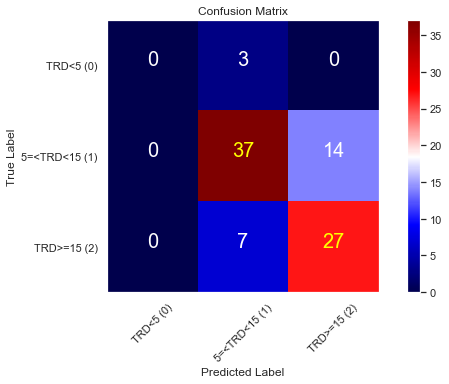

In [14]:
conf_mat_nn = confusion_matrix(b_bool, b_pred)
print('F1 Score:\n',classification_report(b_bool, b_pred))

# Set normalize to true for the confusion matrix to print normalized values
# Call Total Rain Days = TRD
normalize = False
cmap = plt.cm.seismic
width=10
height=width/2

plot_conf_mat(conf_mat_nn, 
              classes=['TRD<5 (0)', 
                       '5=<TRD<15 (1)', 
                       'TRD>=15 (2)'],
              normalize=normalize, cmap=cmap, width=width, height=height)

#### Compare this result against the other Machine Learning models

I will compare the validation set result here against that of the SVM model built earlier

In [15]:
model_svm  = pickle.load(open("model_SVM", "rb"))

In [16]:
b_pred_SVM = model_svm.predict(A_norm)
b_pred_SVM

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1])

F1 Score:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.82      0.80      0.81        51
           2       0.74      0.82      0.78        34

    accuracy                           0.78        88
   macro avg       0.52      0.54      0.53        88
weighted avg       0.76      0.78      0.77        88

Confusion Matrix, non-normalized


C:\Users\quant\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


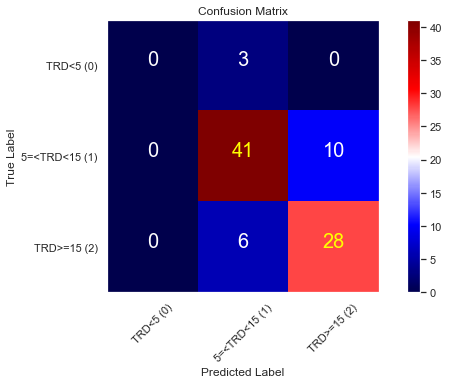

In [17]:
conf_mat_svm = confusion_matrix(b_bool, b_pred_SVM)
print('F1 Score:\n',classification_report(b_bool, b_pred_SVM))

plot_conf_mat(conf_mat_svm, 
              classes=['TRD<5 (0)', 
                       '5=<TRD<15 (1)', 
                       'TRD>=15 (2)'],
              normalize=normalize, cmap=cmap, width=width, height=height)

# Conclusion

In terms of accuracy, both SVM and the neural net are similar. 

Training/Validation Set
 - NN accuracy ~ 0.79
 - SVM accuracy ~ 0.81

Test set
 - NN accuracy ~ 0.73
 - SVM accuracy ~ 0.78

However, the neural net performance is slightly poorer as it predicts more FP (i.e. row 2, col 3 of the confusion matrix)


In [18]:
count = 'Completed Process'
elapsed = (time.time() - start)
print ("%s in %s seconds" % (count,elapsed))

Completed Process in 1.6421198844909668 seconds
